# Week 3 - Share prediction with linear regression

In this assignment, we will use data from Mashable (www.mashable.com). Mashable is an online magazine that focuses on producing viral content. 

We will try to find out what makes an article go viral. We're also gonna build our first lineal regression model.. :)

###  Dataset:

The data comes from a study by Fernandes, Vinagre and Cortez (2015). The data set consists of over 30,000 articles with associated variables such as the title length, the article category and the weekday on which it was published. 

Since we are working with a lot of variables we will use this file for information about them: 

https://archive.ics.uci.edu/ml/datasets/online+news+popularity


### To do:

- Explain briefly in your own words how linear regression works
- Your pre-processing steps
- The head() of the resulting data frame
- Split the dataset into a training and test set
- Select exactly 5 variables (collections of dummy variables, such as weekday_is_monday, weekday_is_tuesday, etc. count as 1 variable).

  - Explain why you selected those variables.
  - Make plots of the relation of your selected variables with the target
  - Comment on the linearity of the relationships
  
- Fit a linear regression model to predict the number of shares (using the training data. Give the equation of the model (please use Markdown formulas)
- Evaluate the model on the test data
  - Predictive power of the model (R2, RMSE)
  - Investigate the residuals

## Linear Regression

Linear Regression is the simplest algorithm in machine learning.

Most specifically, we need to find a function that maps some features or variables to others sufficiently well.
The dependent features are called the dependent variables, outputs, or responses.
The independent features are called the independent variables, inputs, or predictors.

When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.

Lets start by importing our relevant libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data and some Transformation

In [2]:
# load our dataframe and show head.
df = pd.read_csv('data Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [3]:
# print a summary of the columns in df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             24999 non-null  int64  
 1   url                            24999 non-null  object 
 2   n_tokens_title                 24999 non-null  int64  
 3   n_tokens_content               24999 non-null  int64  
 4   num_imgs                       24999 non-null  int64  
 5   num_videos                     24999 non-null  int64  
 6   average_token_length           24999 non-null  float64
 7   data_channel_is_lifestyle      24999 non-null  int64  
 8   data_channel_is_entertainment  24999 non-null  int64  
 9   data_channel_is_bus            24999 non-null  int64  
 10  data_channel_is_socmed         24999 non-null  int64  
 11  data_channel_is_tech           24999 non-null  int64  
 12  data_channel_is_world          24999 non-null 

In [4]:
# Show us the shape of our matrix.
df.shape

(24999, 27)

In [5]:
# show us some statistics.
df.describe()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.00000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,...,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,12500.000000,10.283531,547.052322,4.709988,1.24925,4.585351,0.054562,0.175527,0.162006,0.062082,...,0.143526,0.062082,0.069523,0.131605,0.448574,0.122113,0.278650,0.071327,3523.734229,3.254355
std,7216.734026,2.080625,473.431869,8.602473,4.08842,0.734695,0.227128,0.380425,0.368464,0.241310,...,0.350615,0.241310,0.254346,0.338068,0.109696,0.096567,0.322993,0.261615,13098.996472,0.408068
min,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,-1.000000,1.000000,0.000000
25%,6250.500000,9.000000,246.000000,1.000000,0.00000,4.481996,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.399175,0.062340,0.000000,0.000000,954.000000,2.979548
50%,12500.000000,10.000000,406.000000,1.000000,0.00000,4.663717,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.455556,0.122070,0.112500,0.000000,1500.000000,3.176091
75%,18749.500000,12.000000,713.000000,5.000000,1.00000,4.850842,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.510119,0.180353,0.500000,0.137500,2900.000000,3.462398
max,24999.000000,20.000000,7764.000000,128.000000,75.00000,8.041534,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.655000,1.000000,1.000000,843300.000000,5.925982


In [6]:
y_labels = df['shares'] #the feature to be predicted.

In [7]:
#Drop the categorical columns. 
df = df.drop(columns = ['url'],axis = 1)

## Split our Dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# split data into training and validation data, for both features and target.
# The split is based on a random number generator.
# Supplying a numeric value to the random_state argument guarantees we get the same split every time we run this script.
train_X, val_X, train_y, val_y = train_test_split(df, y_labels, random_state = 1)

## Important!

Now that we splited our Data we are gonna use XGBoost to find the absolute importance of each feature of our dataset. In that way, we can minimize our effort of making features while converting extracted news from articles.

In [10]:
from xgboost import XGBRegressor
from xgboost import plot_importance

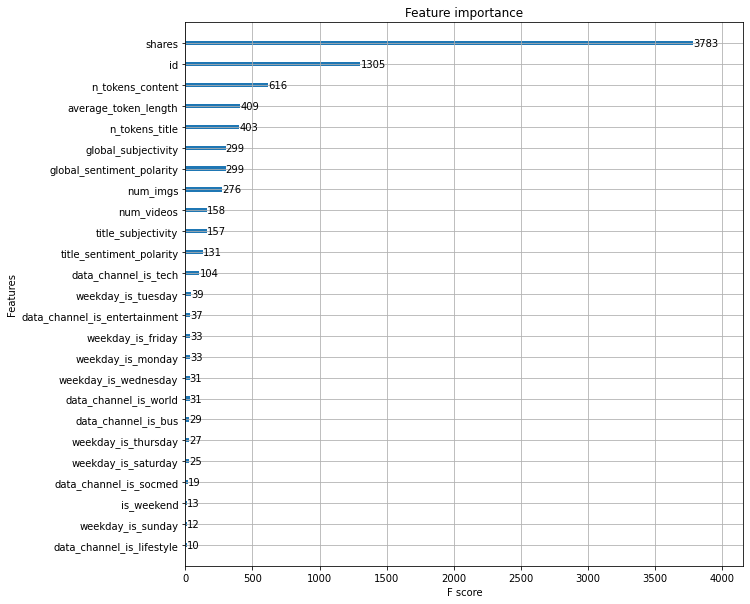

In [11]:
xgb = XGBRegressor(max_depth = 10,random_state = 42) # code needs to be twicked to drop shares log and id from our graph! 
xgb.fit(train_X,train_y)
fig, ax = plt.subplots(1,1,figsize=(10,10))
impplot = plot_importance(xgb,ax = ax)
plt.show()

##### So...

If we exclude shares_log and id columns(they were not supposed to be there), we can see that n_tokens_content, average_token_length, n_tokens_title, global_subjectivity and  num_imgs are of crucial performance when trying to predict our shares.  

We will pick 5 variables for this assingment.

If we have a look at https://archive.ics.uci.edu/ml/datasets/online+news+popularity we can have a better understanding of these variables.

Attribute Information:

  - n_tokens_content: Number of words in the content
  - average_token_length: Average length of the words in the content
  - n_tokens_title: Number of words in the title
  - global_subjectivity: Text subjectivity
  - num_imgs: Number of images
  

##### In other words, 
Some specific characterestics of human behaviour and they way people perceive reality, are affecting the final prediction ! Lets go deeper...

## Relation between our selected variables and the target.


We'll investigate the relation between these numerical variables: n_tokens_content, average_token_length, n_tokens_title, global_subjectivity and num_imgs with our target: shares

### Assign "Features"

- The columns that are inputted into our model (and later used to make predictions) are called "features."


- In our case, those would be the columns used to determine shares_log.


- We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string.

In [12]:
df_features = ['n_tokens_content', 'average_token_length', 'n_tokens_title', 'global_subjectivity', 'num_imgs']

In [13]:
# We call this data X.
X = train_X[df_features]

In [14]:
X.describe()

,n_tokens_content,average_token_length,n_tokens_title,global_subjectivity,num_imgs
count,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000
mean,546.028001,4.584525,10.283802,0.448485,4.687823
std,471.791808,0.737810,2.085935,0.110051,8.403158
min,0.000000,0.000000,3.000000,0.000000,0.000000
25%,246.000000,4.483776,9.000000,0.399259,1.000000
50%,407.000000,4.664047,10.000000,0.455136,1.000000
75%,711.000000,4.850181,12.000000,0.509797,5.000000
max,7764.000000,8.041534,20.000000,1.000000,111.000000


In [15]:
X.head()

,n_tokens_content,average_token_length,n_tokens_title,global_subjectivity,num_imgs
3272,229,4.737991,5,0.431546,12
14858,1750,4.962286,14,0.474415,1
6238,476,4.955882,12,0.378997,1
10796,352,4.406250,8,0.284644,1
20476,612,4.777778,8,0.511264,1


Our features are ready.

### Selecting the Prediction Target

- We can pull out a variable with dot-notation. This single column is stored in a Series. 


- This Series is broadly like a DataFrame with only a single column of data.


- We'll use the dot notation to select the column we want to predict, which is called the prediction target.


- In our case is shares

In [16]:
# We call this target y.
y = train_y
y.head()

3272     5900
14858    2600
6238     2000
10796     589
20476    2000
Name: shares, dtype: int64

In [17]:
y.shape

(18749,)

Our target is ready.

At this moment we could train our model and make some predictions but first lets deploy some graphs to get an even better understanding of the features we choosed :) 

## Exploratory Data Analysis (EDA) 

##### n_tokens_content

Text(0, 0.5, 'Shares')

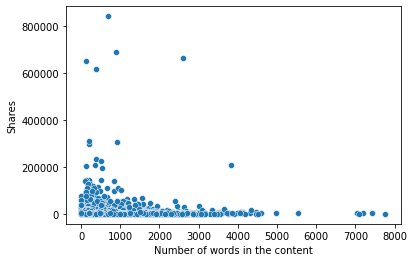

In [18]:
sns.scatterplot(x=X['n_tokens_content'], y=y)
plt.xlabel('Number of words in the content') 
plt.ylabel('Shares')

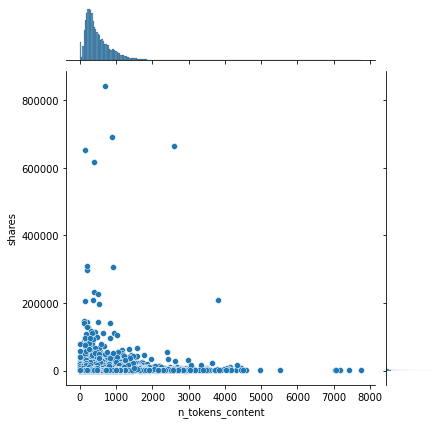

In [19]:
sns.jointplot(data=X, x=X['n_tokens_content'], y=y)

- We can safely assume that small articles(less than 2000 words), tend to have more shares and this makes sense.
 
 
- In fact, we can assume that if we want an article to go viral(over 200000 shares), it has to be very small(less than 1000 words)! 

##### average_token_length

Text(0, 0.5, 'Shares')

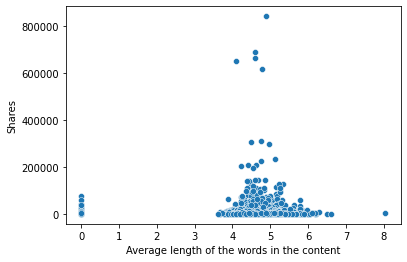

In [20]:
sns.scatterplot(x=X['average_token_length'], y=y)
plt.xlabel('Average length of the words in the content') 
plt.ylabel('Shares')

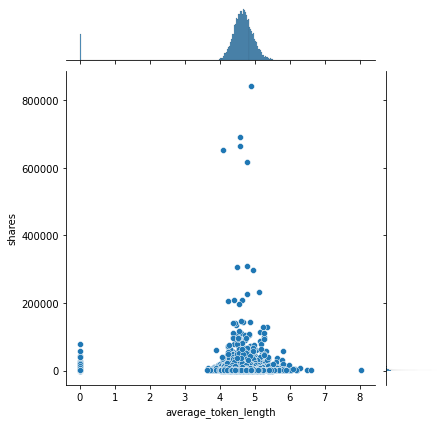

In [21]:
sns.jointplot(data=X, x=X['average_token_length'], y=y)

- Here, we can assume that if the length of the words of an article is between 4 to 6 letters, the article is more engaging and therefore leads to more shares.


- Articles that went viral (more than 600000 shares) had all on average 4 to 5 letters per word.

##### n_tokens_title

<AxesSubplot:xlabel='n_tokens_title', ylabel='shares'>

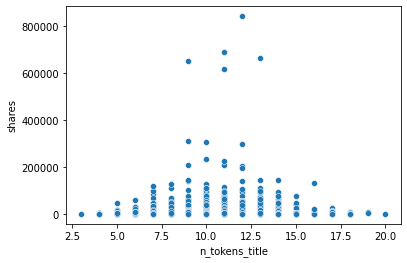

In [22]:
sns.scatterplot(x=X['n_tokens_title'], y=y)

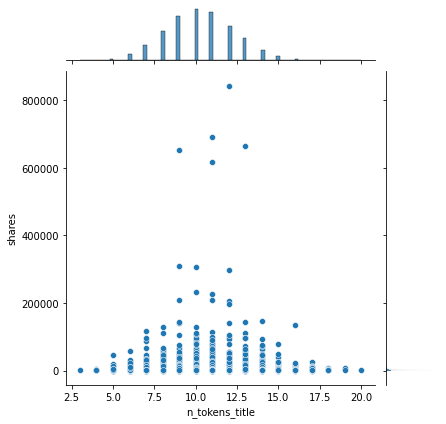

In [23]:
sns.jointplot(data=X, x=X['n_tokens_title'], y=y)

In [24]:
X['n_tokens_title'].describe()

count    18749.000000
mean        10.283802
std          2.085935
min          3.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         20.000000
Name: n_tokens_title, dtype: float64

- The center of the distribution is around 10. 10 is considered the best number of words per title!


- The standard deviation is about 2 words.


- There is no right or left skew. The distribution is symmetrical.


##### global_subjectivity

Text(0, 0.5, 'Shares')

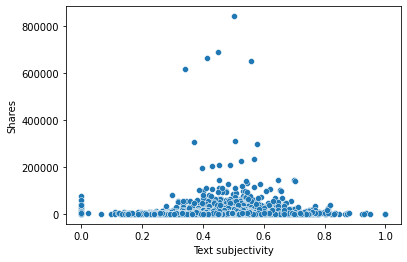

In [25]:
sns.scatterplot(x=X['global_subjectivity'], y=y)
plt.xlabel('Text subjectivity') 
plt.ylabel('Shares')

##### num_imgs

Text(0, 0.5, 'Shares')

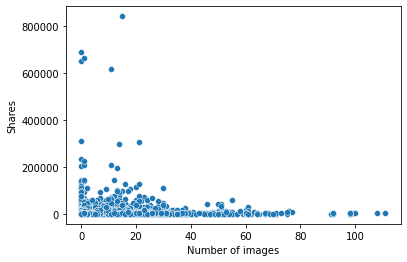

In [26]:
sns.scatterplot(x=X['num_imgs'], y=y)
plt.xlabel('Number of images') 
plt.ylabel('Shares')

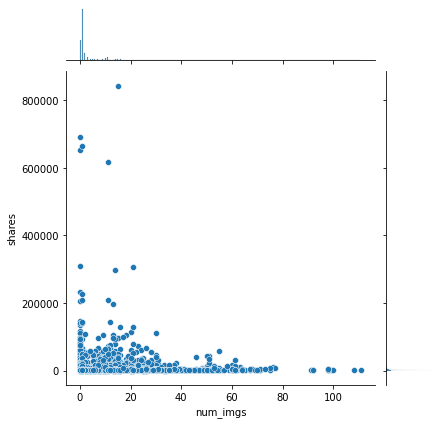

In [27]:
sns.jointplot(data=X, x=X['num_imgs'], y=y)

0 number of images leads to more shares!?

## Deploy our model

- We have already splited our data


- We are gonna use the scikit library for machine learning

In [28]:
from sklearn.linear_model import LinearRegression

In [40]:
# Define model. Specify a number for random_state to ensure same results each run
model = LinearRegression()

# Fit model
model.fit(train_X, train_y)

print("Predicting how many shares the first 5 articles of our validation data are going to get..")
print("The predictions are:")
print(model.predict(val_X.head()))

Predicting how many shares the first 5 articles of our validation data are going to get..
The predictions are:
[3600. 1300. 1900. 4200. 6900.]


## Model Evaluation

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
predictions = model.predict(val_X)
print(mean_absolute_error(val_y, predictions))

4.742597639051382e-12
